In [113]:
import json
import pandas as pd
from PIL import Image
import requests
from io import BytesIO

In [30]:
d = {'all':[]}

In [31]:
with open("/home/yagor/Рабочий стол/yandex generation/load data/pictures_market.txt") as infile:
    for line in infile:
        result = json.loads(line)
        d['all'].append(result)

In [32]:
d['all'][:4]

[{'market_sku_id': 1402035435,
  'pic_url': '//avatars.mds.yandex.net/get-marketpic/7044394/pica9692af9f592bdfc7aee38b686671dbb/orig',
  'verdict': 'clean_photo_good_background'},
 {'market_sku_id': 1402035435,
  'pic_url': '//avatars.mds.yandex.net/get-marketpic/5620596/pic7d49c40de3f19571947ea5020d65dc58/orig',
  'verdict': 'clean_photo_good_background'},
 {'market_sku_id': 1402035435,
  'pic_url': '//avatars.mds.yandex.net/get-marketpic/1708436/market_CfX1qvp7t7XzAIHSoZFd1w/orig',
  'verdict': 'other_infographics'},
 {'market_sku_id': 729239006,
  'pic_url': '//avatars.mds.yandex.net/get-marketpic/1897710/pic05c1a4a532e318bcf70ed699900c9ae9/orig',
  'verdict': 'clean_photo_good_background'}]

In [34]:
df = pd.DataFrame(d['all'])

In [35]:
df

,market_sku_id,pic_url,verdict
0,1402035435,//avatars.mds.yandex.net/get-marketpic/7044394...,clean_photo_good_background
1,1402035435,//avatars.mds.yandex.net/get-marketpic/5620596...,clean_photo_good_background
2,1402035435,//avatars.mds.yandex.net/get-marketpic/1708436...,other_infographics
3,729239006,//avatars.mds.yandex.net/get-marketpic/1897710...,clean_photo_good_background
4,429050296,//avatars.mds.yandex.net/get-marketpic/8786714...,good_infographics
...,...,...,...
1131827,100818966350,//avatars.mds.yandex.net/get-marketpic/1697981...,clean_photo_good_background
1131828,100972165930,//avatars.mds.yandex.net/get-marketpic/1582458...,clean_photo_good_background
1131829,101815744136,//avatars.mds.yandex.net/get-marketpic/7067214...,good_infographics
1131830,101603206373,//avatars.mds.yandex.net/get-marketpic/1338103...,good_infographics


In [186]:
id_with_bad_infographic = df[df['verdict']=='bad_infographics']['market_sku_id']
id_with_bad_infographic

46             10967880
89             13619877
279        101765721070
301        101920073351
305        101889207773
               ...     
1131694    100634962328
1131695    101852853677
1131727    101391700520
1131759    101797607435
1131826       431075969
Name: market_sku_id, Length: 50719, dtype: int64

In [190]:
id_with_bad_infographic_unique = id_with_bad_infographic.unique()

In [193]:
print(len(id_with_bad_infographic_unique))
id_with_bad_infographic_unique

43125


array([    10967880,     13619877, 101765721070, ..., 101852853677,
       101797607435,    431075969])

In [174]:
df['verdict'].value_counts()

clean_photo_good_background     467031
good_infographics               300772
other_infographics              219703
bad_infographics                 50719
clean_photo_other_background     50496
clean_photo_bad_background       28440
clean_photo_image_background     14671
Name: verdict, dtype: int64

In [175]:
classes = df['verdict'].value_counts()

In [108]:
classes.index

Index(['clean_photo_good_background', 'good_infographics',
       'other_infographics', 'bad_infographics',
       'clean_photo_other_background', 'clean_photo_bad_background',
       'clean_photo_image_background'],
      dtype='object')

In [39]:
df['market_sku_id'].value_counts()

101802372922    8
734035024       8
100441665387    8
443046517       8
639973199       8
               ..
101218584488    1
101218517235    1
101218514066    1
101218513145    1
106655666       1
Name: market_sku_id, Length: 311114, dtype: int64

In [91]:
one_from_df = df[df['market_sku_id']==443046517]

In [92]:
one_from_df

,market_sku_id,pic_url,verdict
50198,443046517,//avatars.mds.yandex.net/get-marketpic/5500970...,clean_photo_good_background
50199,443046517,//avatars.mds.yandex.net/get-marketpic/5463583...,bad_infographics
267229,443046517,//avatars.mds.yandex.net/get-marketpic/6063178...,good_infographics
889919,443046517,//avatars.mds.yandex.net/get-marketpic/5968130...,other_infographics
931819,443046517,//avatars.mds.yandex.net/get-marketpic/6707219...,clean_photo_other_background
1023569,443046517,//avatars.mds.yandex.net/get-marketpic/364498/...,clean_photo_other_background
1030396,443046517,//avatars.mds.yandex.net/get-marketpic/1585113...,bad_infographics
1046090,443046517,//avatars.mds.yandex.net/get-marketpic/4331446...,clean_photo_other_background


In [96]:
clean_photo_good_background = one_from_df[one_from_df['verdict']=='clean_photo_good_background']

In [164]:
from matplotlib.pyplot import figure, imshow, axis
import matplotlib.pyplot as plt
from matplotlib.image import imread
def showImagesHorizontally(list_of_images, name):
    number_of_images = len(list_of_images)
    fig = figure(figsize=(10, 6*number_of_images))
    for i in range(number_of_images):
        a=fig.add_subplot(1,number_of_images,i+1)
        plt.imshow(list_of_images[i])
        plt.title(name)
    plt.show()

In [178]:
def urls_to_images(urls):
    images = []
    for i in urls:
        try:
            response = requests.get(i)
            images.append(Image.open(BytesIO(response.content)))
        except:
            print(f'not load {i}')
    return images

In [179]:
indexs = df['market_sku_id'].value_counts()

In [180]:
indexs[indexs>7].iloc[7:10].index.to_list()

[439425784, 101416995415, 647123092]

In [177]:
def show_example_with_inforaphic(indexs):
    classes = df['verdict'].value_counts().index
    for i in indexs:
        one_from_df = df[df['market_sku_id']==i]
        print('---------------------------------- индекс:' + str(i) +  '--------------------------------')
        for j in classes:
            names = []
            photo_with_class = one_from_df[one_from_df['verdict']==j]
            if len(photo_with_class)>=1:
                print('---------------------------------- класс:' + str(j) +  '--------------------------------')
                for k in photo_with_class.values:
                    names.append(f'https:{k[1]}')
                images = urls_to_images(names)
                showImagesHorizontally(images, j)

---------------------------------- индекс:100373645260--------------------------------
---------------------------------- класс:clean_photo_good_background--------------------------------


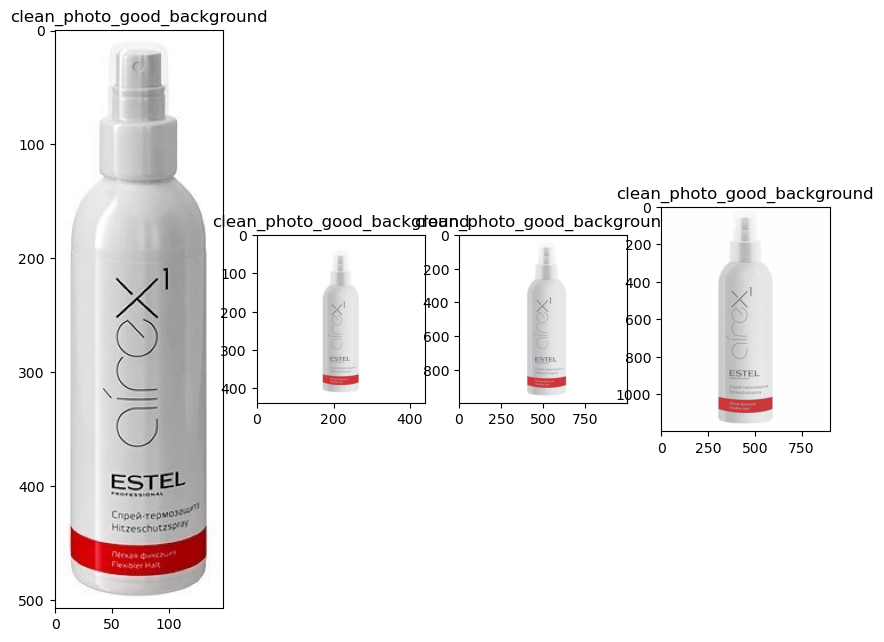

---------------------------------- класс:good_infographics--------------------------------


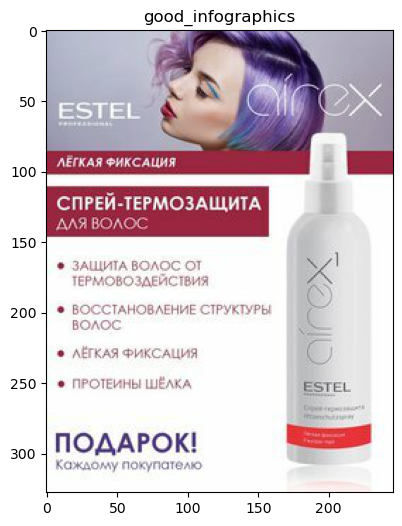

---------------------------------- класс:bad_infographics--------------------------------


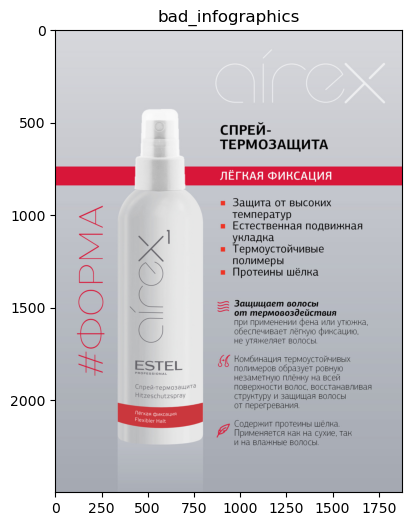

---------------------------------- индекс:101817060418--------------------------------
---------------------------------- класс:clean_photo_good_background--------------------------------


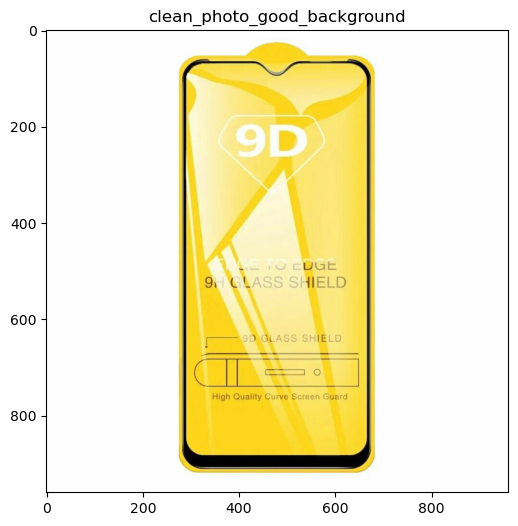

---------------------------------- класс:bad_infographics--------------------------------


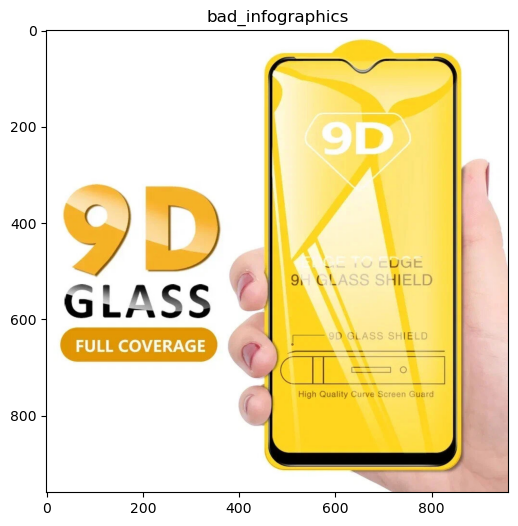

---------------------------------- класс:clean_photo_other_background--------------------------------


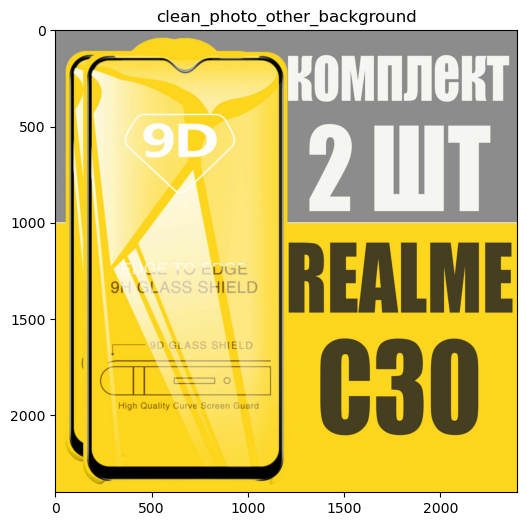

---------------------------------- индекс:101425329638--------------------------------
---------------------------------- класс:clean_photo_good_background--------------------------------


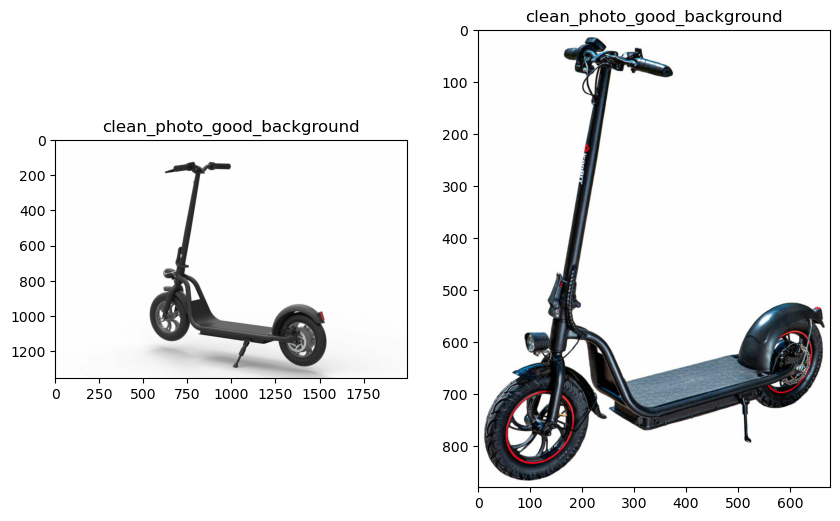

---------------------------------- класс:bad_infographics--------------------------------


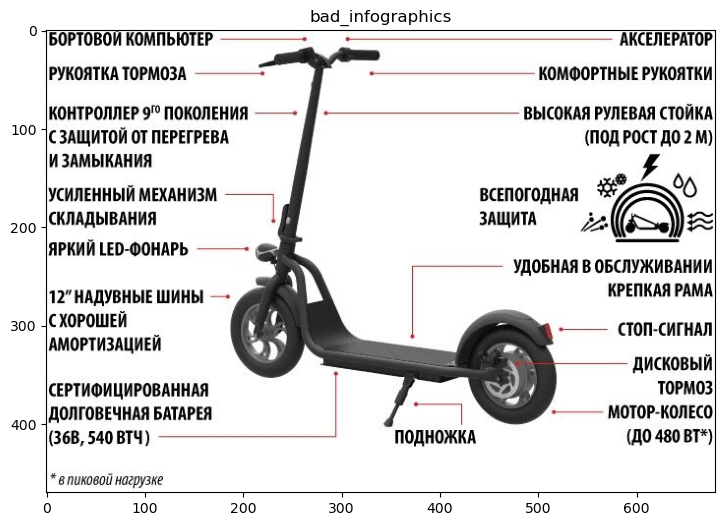

---------------------------------- индекс:101712661523--------------------------------
---------------------------------- класс:bad_infographics--------------------------------


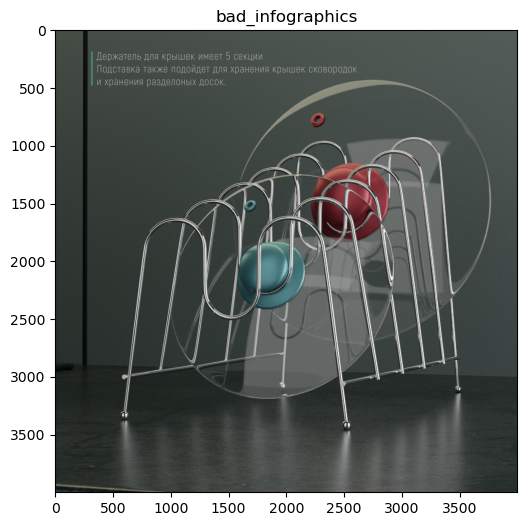

---------------------------------- класс:clean_photo_bad_background--------------------------------


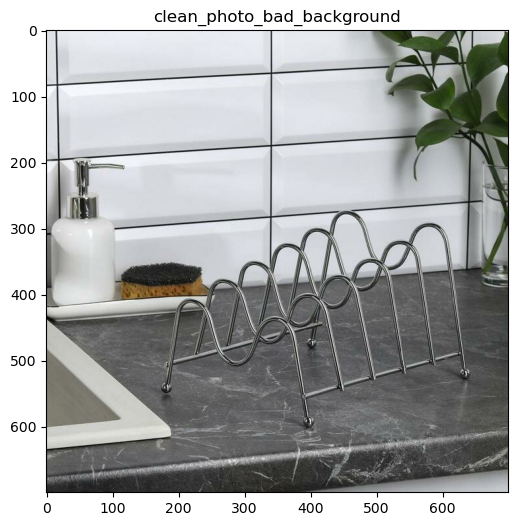

---------------------------------- класс:clean_photo_image_background--------------------------------


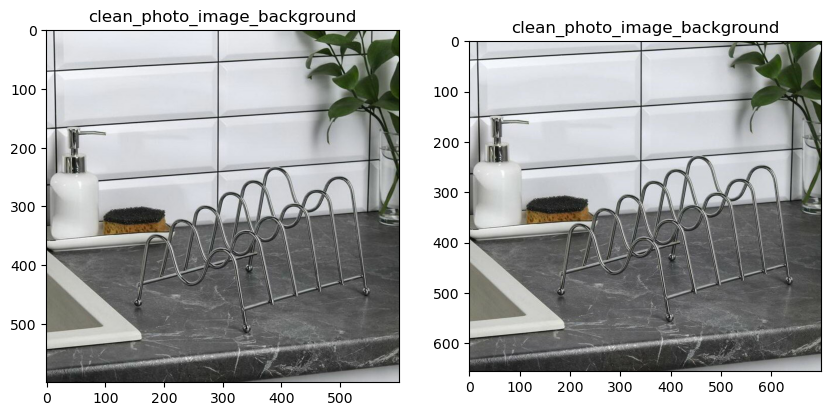

---------------------------------- индекс:101722870578--------------------------------
---------------------------------- класс:clean_photo_good_background--------------------------------


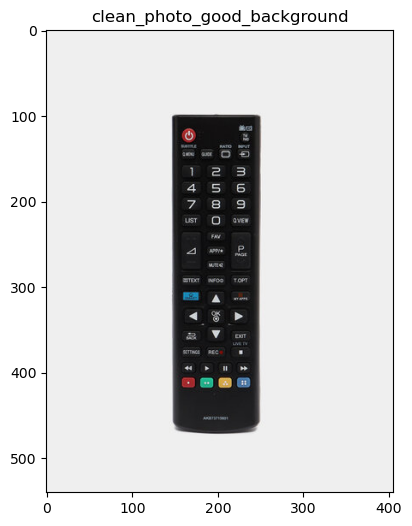

---------------------------------- класс:bad_infographics--------------------------------


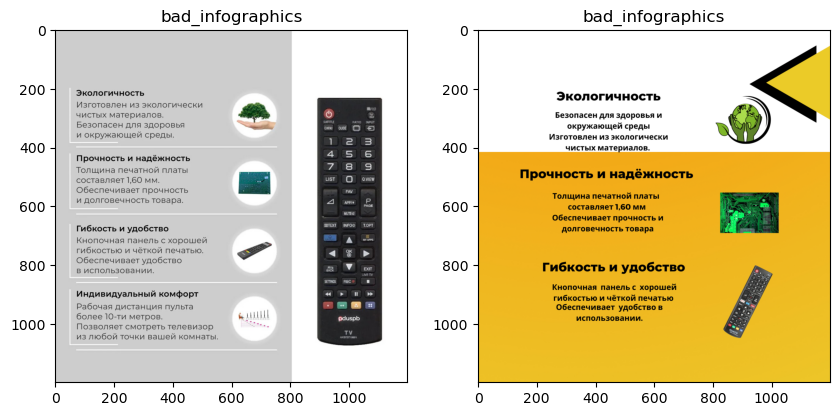

In [194]:
# inds = indexs[indexs>7].iloc[10:20].index.to_list()
inds = id_with_bad_infographic_unique[10:15]
show_example_with_inforaphic(inds)